# Worksheet 21

Name:  AlHasan Bahaidarah
UID: U13327725

### Topics

- Logistic Regression

## Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR

def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

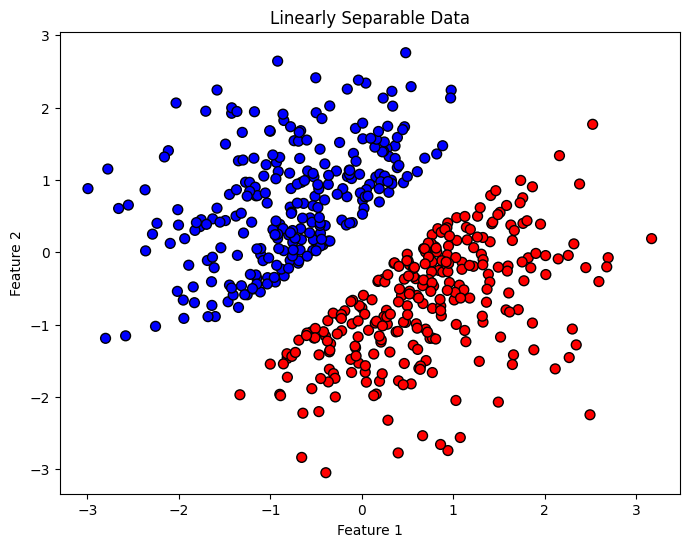

In [4]:

def generate_line_data():
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generate linearly separable data
X, Y = generate_line_data()

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolor='k', s=50)
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [8]:
model = LogisticRegression().fit(X, Y)
coefficients = model.coef_
intercept = model.intercept_

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

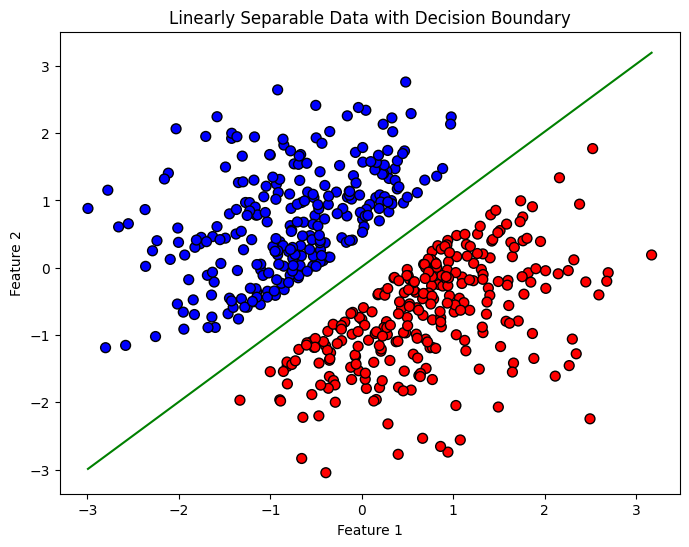

In [9]:
# Calculate the decision boundary line
slope = -coefficients[0,0] / coefficients[0,1]
intercept = -intercept / coefficients[0,1]
x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = slope * x_values + intercept

# Plotting the scatter plot again with the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolor='k', s=50)
plt.plot(x_values, y_values, color="green") # Decision boundary
plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

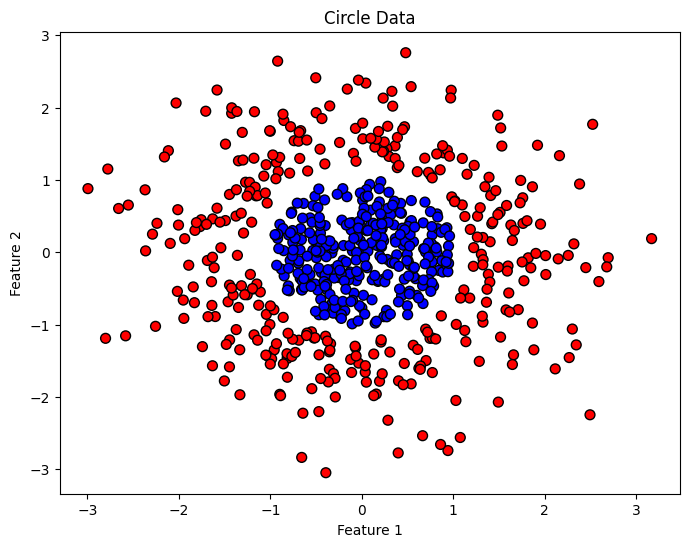

In [10]:
# Generate circle data using the provided function
def generate_circle_data(t):
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

X_circle, Y_circle = generate_circle_data(t)

# Plotting the circle data
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap='bwr', edgecolor='k', s=50)
plt.title('Circle Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [12]:
model = ...

pipeline = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())

# Fit the model to the circle data
pipeline.fit(X_circle, Y_circle)

# Extracting coefficients and intercept from the logistic regression model
model_circle = pipeline.named_steps['logisticregression']
coefficients_circle = model_circle.coef_
intercept_circle = model_circle.intercept_

coefficients_circle, intercept_circle


(array([[-8.61296914e-06,  2.98528608e-02, -4.75348752e-02,
          4.90954524e+00,  3.79284730e-01,  4.95644714e+00]]),
 array([-6.47657886]))

f) Plot the decision boundary using the code below.

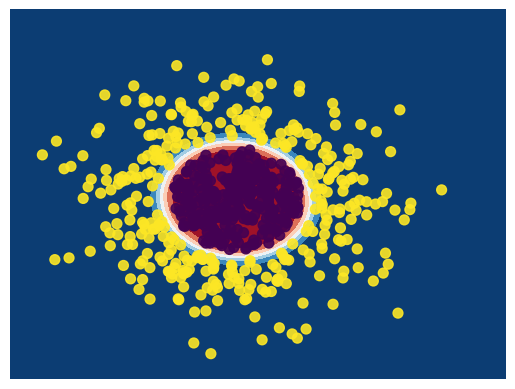

In [14]:
# Step size in the mesh
h = .02

# Creating a mesh to plot in
x_min, x_max = X_circle[:, 0].min() - .5, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - .5, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Plotting
fig, ax = plt.subplots()
# Using the pipeline model for prediction
A = pipeline.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = pipeline.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, alpha=0.9)
plt.show()


g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

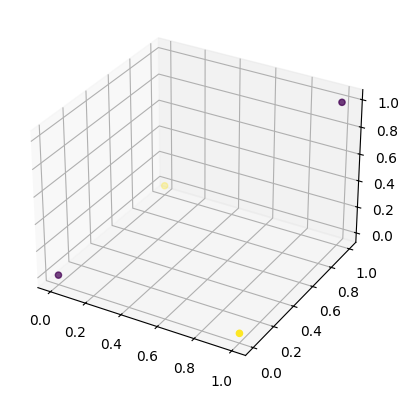

In [15]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

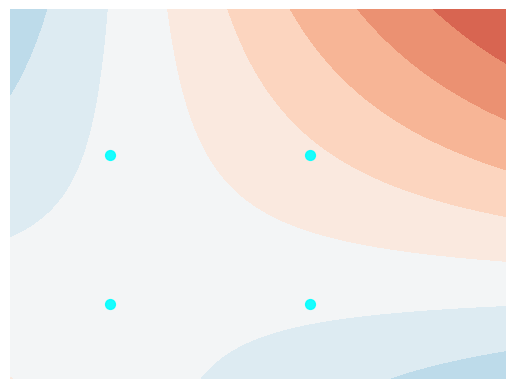

In [18]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

Best Score:  0.75
Random State:  0
Solver:  lbfgs
Coefficients:  [[ 0.04264189  0.04266213 -0.43040083]]
Intercept:  [0.0647879]


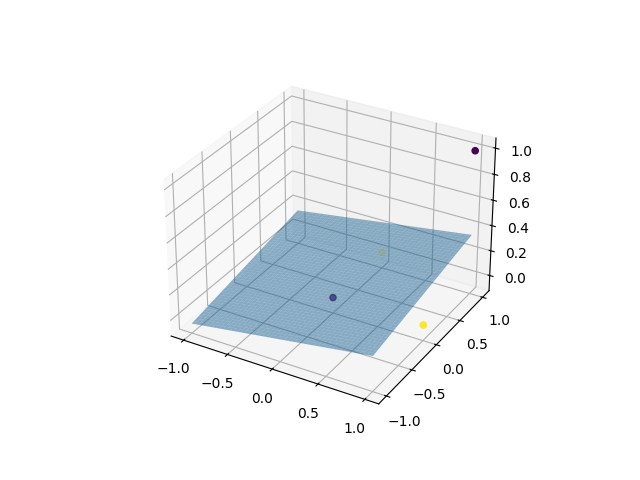

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Transform the data with interaction terms
X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)

best_score = 0
best_state = None
best_solver = None

# Trying a few different random states and solvers
for i in range(10):  # Reducing the range for practicality
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        score = model.score(X_transform, Y)
        if score > best_score:
            best_score = score
            best_state = i
            best_solver = solver
            if score > .75:
                break

if best_score > 0:
    print("Best Score: ", best_score)
    print("Random State: ", best_state)
    print("Solver: ", best_solver)
    print("Coefficients: ", model.coef_)
    print("Intercept: ", model.intercept_)

    # Generating mesh for the plot
    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

    # Plotting in 3D
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 0] * X[:, 1], c=Y)
    ax.plot_surface(xx, yy, z, alpha=0.5)
    plt.show()
else:
    print("No suitable model found.")


i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

 This problem is unconstrained.
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


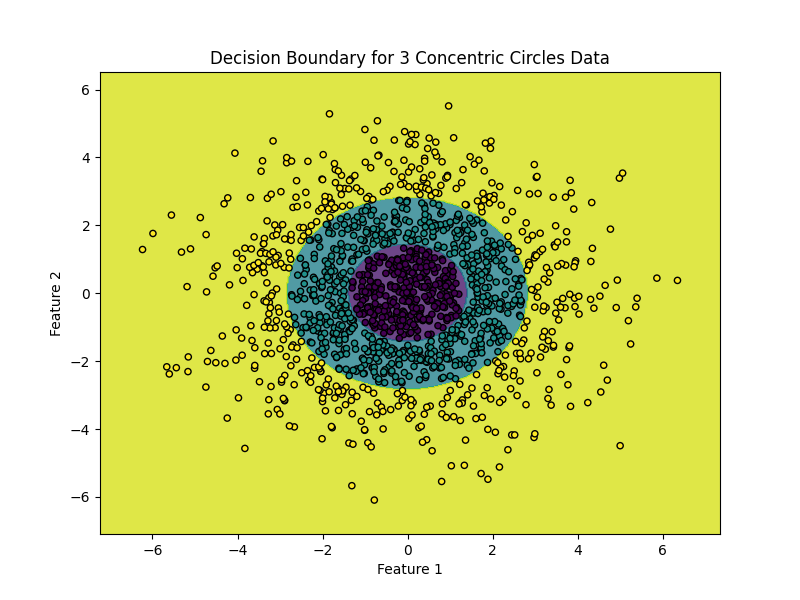

In [24]:
# Generating 3 concentric circles data
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)

def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X_circles, Y_circles = generate_circles_data(t)

# Fitting a logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2, multi_class='multinomial')
model_circles = make_pipeline(poly, lr)
model_circles.fit(X_circles, Y_circles)

# Plotting the decision boundary
x_min, x_max = X_circles[:, 0].min() - 1, X_circles[:, 0].max() + 1
y_min, y_max = X_circles[:, 1].min() - 1, X_circles[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = model_circles.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=Y_circles, edgecolor='k', s=20)
plt.title("Decision Boundary for 3 Concentric Circles Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
